In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X = dataset[:,0:10]

In [7]:
Y = dataset[:,10]

In [8]:
from sklearn import preprocessing

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [10]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [13]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [14]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [16]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [17]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 0.7089 - accuracy: 0.3004 - val_loss: 0.7034 - val_accuracy: 0.3607
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7001 - accuracy: 0.4110 - val_loss: 0.6964 - val_accuracy: 0.4566
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4932 - val_loss: 0.6907 - val_accuracy: 0.4977
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5000 - val_loss: 0.6860 - val_accuracy: 0.4977
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.5049 - val_loss: 0.6817 - val_accuracy: 0.5023
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.5049 - val_loss: 0.6776 - val_accuracy: 0.5023
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6746 - accuracy: 0.5078 - val_loss: 0.6736 - val_accuracy: 0.5023
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3240 - accuracy: 0.8826 - val_loss: 0.3561 - val_accuracy: 0.8767
Epoch 60/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3218 - accuracy: 0.8865 - val_loss: 0.3537 - val_accuracy: 0.8721
Epoch 61/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3183 - accuracy: 0.8796 - val_loss: 0.3516 - val_accuracy: 0.8721
Epoch 62/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3157 - accuracy: 0.8796 - val_loss: 0.3496 - val_accuracy: 0.8767
Epoch 63/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3134 - accuracy: 0.8806 - val_loss: 0.3477 - val_accuracy: 0.8767
Epoch 64/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3114 - accuracy: 0.8806 - val_loss: 0.3465 - val_accuracy: 0.8767
Epoch 65/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3086 - accuracy: 0.8865 - val_loss: 0.3447 - val_accuracy: 0.8721
Epoch 

In [19]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 667us/step - loss: 0.3015 - accuracy: 0.8767


0.8767123222351074

In [20]:
import matplotlib.pyplot as plt

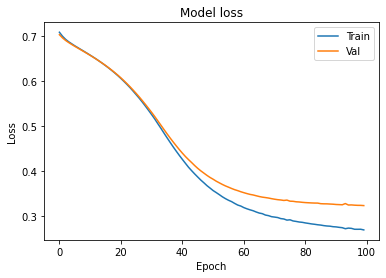

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

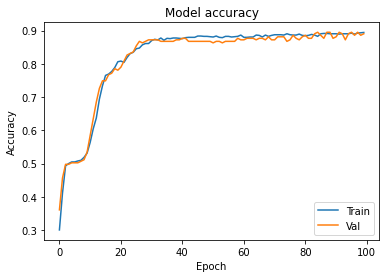

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [23]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 27ms/step - loss: 0.4503 - accuracy: 0.8004 - val_loss: 0.3385 - val_accuracy: 0.8721
Epoch 2/100
32/32 [==============================] - 1s 24ms/step - loss: 0.3519 - accuracy: 0.8523 - val_loss: 0.3364 - val_accuracy: 0.8813
Epoch 3/100
32/32 [==============================] - 1s 23ms/step - loss: 0.3424 - accuracy: 0.8611 - val_loss: 0.3283 - val_accuracy: 0.8630
Epoch 4/100
32/32 [==============================] - 1s 24ms/step - loss: 0.2841 - accuracy: 0.8806 - val_loss: 0.3505 - val_accuracy: 0.8858
Epoch 5/100
32/32 [==============================] - 1s 24ms/step - loss: 0.2849 - accuracy: 0.8845 - val_loss: 0.3297 - val_accuracy: 0.8904
Epoch 6/100
32/32 [==============================] - 1s 25ms/step - loss: 0.2478 - accuracy: 0.8943 - val_loss: 0.3172 - val_accuracy: 0.8904
Epoch 7/100
32/32 [==============================] - 1s 24ms/step - loss: 0.2547 - accuracy: 0.8845 - val_loss: 0.3455 - val_accuracy: 0.8767
Epoch 

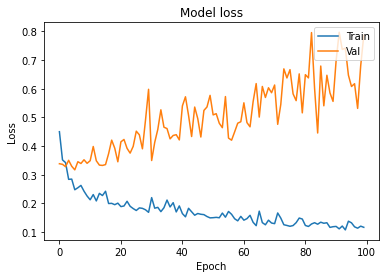

In [24]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

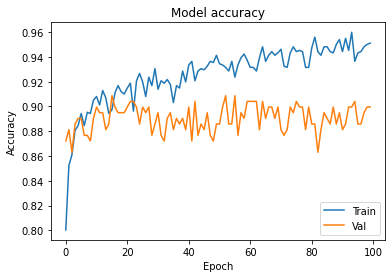

In [25]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [27]:
from keras.layers import Dropout
from keras import regularizers

In [28]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [29]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 45ms/step - loss: 14.2427 - accuracy: 0.6389 - val_loss: 3.9113 - val_accuracy: 0.7352
Epoch 2/100
32/32 [==============================] - 1s 44ms/step - loss: 1.6725 - accuracy: 0.8366 - val_loss: 0.6828 - val_accuracy: 0.8539
Epoch 3/100
32/32 [==============================] - 1s 41ms/step - loss: 0.5506 - accuracy: 0.8630 - val_loss: 0.5626 - val_accuracy: 0.8584
Epoch 4/100
32/32 [==============================] - 1s 45ms/step - loss: 0.4931 - accuracy: 0.8689 - val_loss: 0.5187 - val_accuracy: 0.8904
Epoch 5/100
32/32 [==============================] - 2s 59ms/step - loss: 0.4909 - accuracy: 0.8796 - val_loss: 0.5301 - val_accuracy: 0.8493
Epoch 6/100
32/32 [==============================] - 1s 41ms/step - loss: 0.4803 - accuracy: 0.8816 - val_loss: 0.4865 - val_accuracy: 0.8767
Epoch 7/100
32/32 [==============================] - 1s 41ms/step - loss: 0.4629 - accuracy: 0.8826 - val_loss: 0.4882 - val_accuracy: 0.8721
Epoch

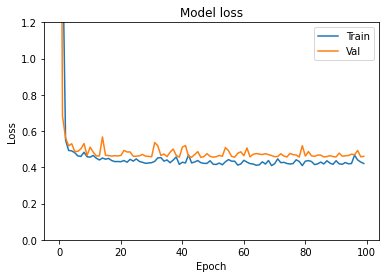

In [30]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

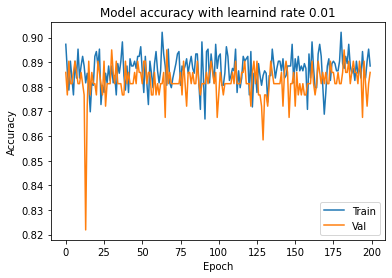

In [35]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy with learning rate ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

NameError: name 'fit_model_3' is not defined

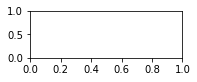

In [48]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy with learning rate ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
for i in range(len(learning_rates)):
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    # fit model and plot learning curves for a learning rate
    fit_model_3(X_train,Y_train,X_val,Y_val,learning_rates[i])
# show learning curves
plt.show()